# Анализ цен на ноутбуки

### Импорт библиотек и загрузка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# Загрузка данных
data = pd.read_csv('laptopPrice.csv')

# Просмотр первых строк данных
data.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0


### Описание
- brand	- Бренд ноутбука (например, ASUS, Lenovo, HP и т.д.).
- processor_brand - Производитель процессора (например, Intel, AMD).
- processor_name - Название процессора (например, Core i3, Ryzen 5).
- processor_gnrtn - Поколение процессора (например, 10th, 11th).
- ram_gb - Объем оперативной памяти в гигабайтах (например, 4 GB, 8 GB).
- ram_typ - Тип оперативной памяти (например, DDR4, LPDDR4).
- ssd - Объем SSD-накопителя в гигабайтах (например, 256 GB, 512 GB).
- hdd - Объем HDD-накопителя в гигабайтах (например, 1024 GB).
- os - Операционная система (например, Windows, DOS, Mac).
- os_bit - Разрядность операционной системы (например, 32-bit, 64-bit).
- graphic_card_gb - Объем видеопамяти в гигабайтах (например, 2 GB, 4 GB).
- weight - Вес ноутбука (например, Casual, ThinNlight).
- warranty - Гарантия на ноутбук (например, 1 year, No warranty).
- Touchscreen - Наличие сенсорного экрана (Yes/No).
- msoffice - Наличие предустановленного Microsoft Office (Yes/No).
- Price - Цена ноутбука в индийских рупиях (целевая переменная).
- rating - Рейтинг ноутбука (например, 3 stars, 4 stars).
- Number of Ratings - Количество оценок ноутбука.
- Number of Reviews - Количество отзывов о ноутбуке.

In [9]:
# Проверка пустых значений
null_counts = data.isnull().sum()
print(null_counts)

brand              0
processor_brand    0
ram_gb             0
ssd                0
hdd                0
os                 0
graphic_card_gb    0
Price              0
dtype: int64


### Вывод: пустые значения не найдены

## Визуальный анализ

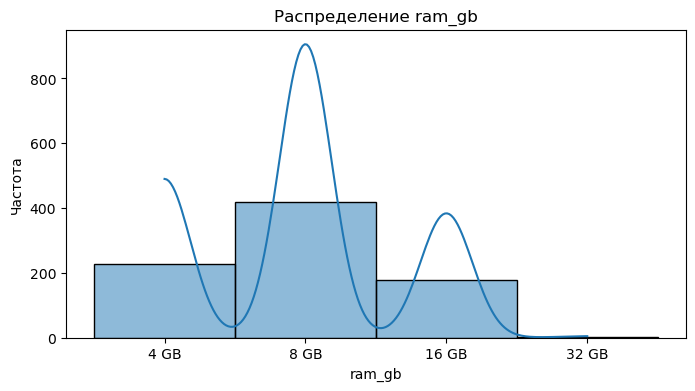

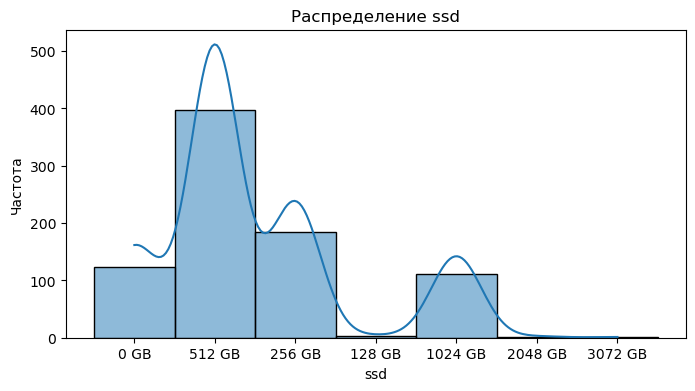

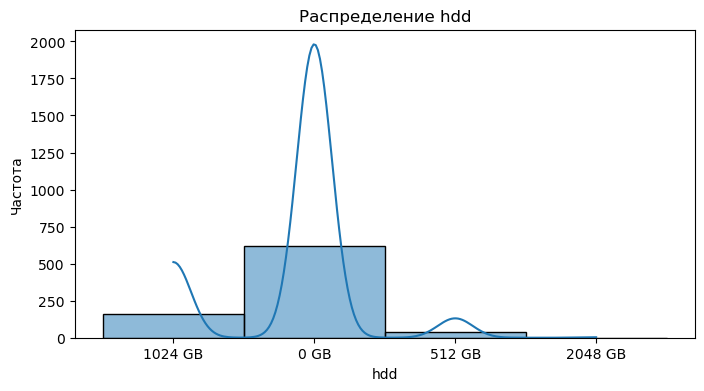

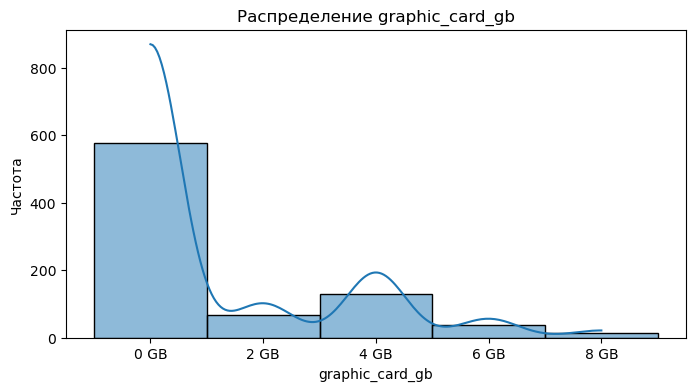

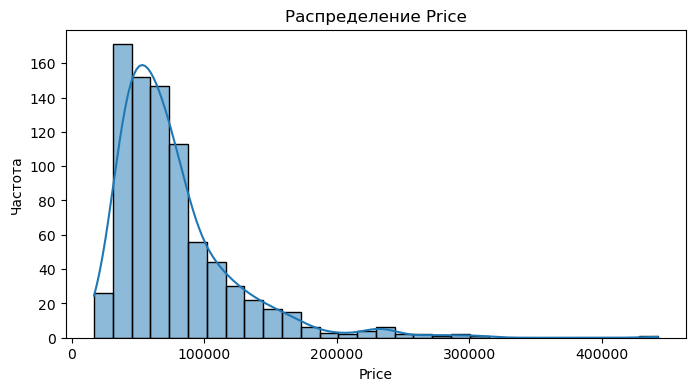

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Графический анализ для числовых атрибутов
numerical_columns = ['ram_gb', 'ssd', 'hdd', 'graphic_card_gb', 'Price']

for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[column], kde=True, bins=30)
    plt.title(f'Распределение {column}')
    plt.xlabel(column)
    plt.ylabel('Частота')
    plt.show()

### Для атрибута Price (цена) будет видно правостороннее распределение (перекос вправо), что типично для данных о ценах.

### Для атрибута ram_gb (объем оперативной памяти) будет видно несколько пиков, соответствующих популярным объемам памяти (например, 4 GB, 8 GB, 16 GB).

In [13]:
from sklearn.preprocessing import LabelEncoder

# Создаем копию DataFrame, чтобы не изменять исходные данные
data_encoded = data.copy()

# Инициализируем LabelEncoder
label_encoder = LabelEncoder()

# Проходим по всем столбцам
for column in data_encoded.columns:
    # Если столбец является объектом (строковым), кодируем его
    if data_encoded[column].dtype == 'object':
        data_encoded[column] = label_encoder.fit_transform(data_encoded[column])
    # Если столбец уже числовой, преобразуем его в int
    else:
        data_encoded[column] = data_encoded[column].astype(int)

# Проверяем результат
data_encoded.head()

,brand,processor_brand,ram_gb,ssd,hdd,os,graphic_card_gb,Price
0,1,1,2,0,1,2,0,34649
1,5,1,2,0,1,2,0,38999
2,5,1,2,0,1,2,0,39999
3,1,1,3,6,0,2,1,69990
4,1,1,2,0,3,2,0,26990


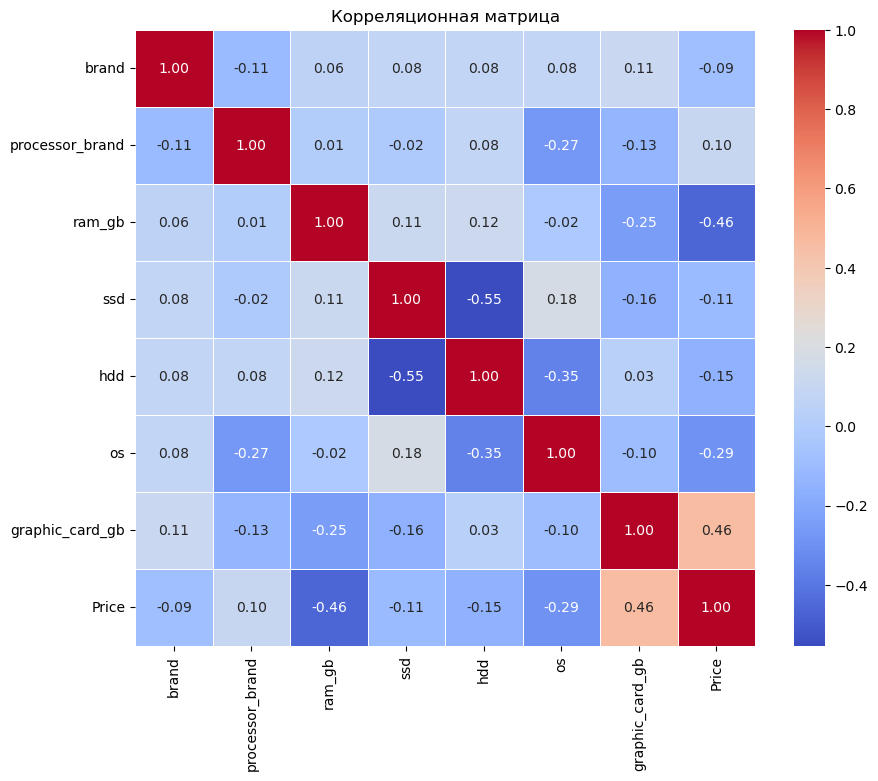

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Вычисляем корреляционную матрицу
correlation_matrix = data_encoded.corr()

# Визуализируем корреляционную матрицу с помощью тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Корреляционная матрица")
plt.show()

# Сравнение моделей регрессии

### Импорт библиотек

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

### Подготовка данных

In [27]:
X = data_encoded.drop('Price', axis=1)  # Признаки
y = data_encoded['Price']  # Целевая переменная

In [28]:
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Линейная регрессия

In [25]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

Text(0.5, 1.0, 'Линейная регрессия')

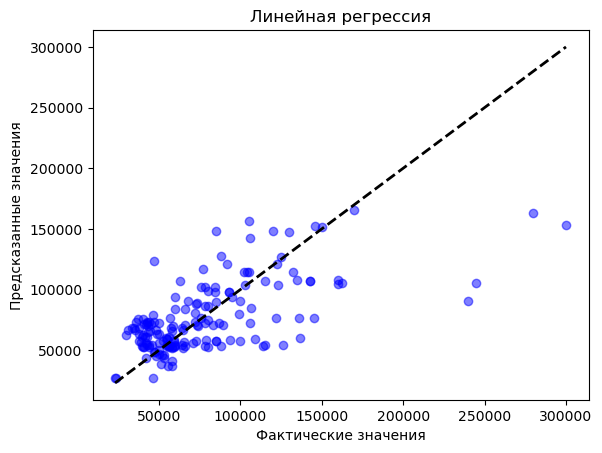

In [29]:
plt.subplot(1, 1, 1)
plt.scatter(y_test, y_pred_lr, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.title('Линейная регрессия')

### Регрессия на основе дерева решений

In [30]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

Text(0.5, 1.0, 'Дерево решений')

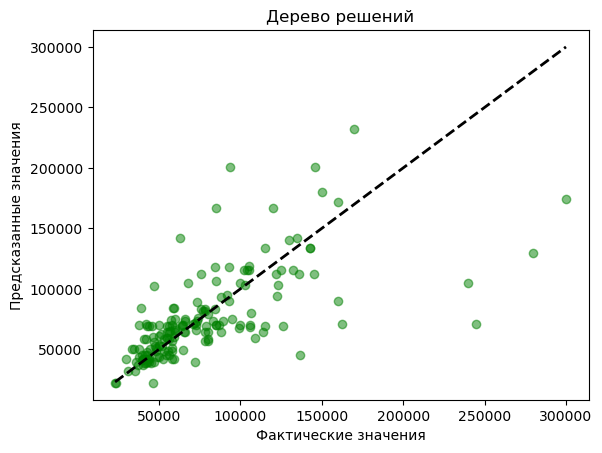

In [32]:
# График для дерева решений
plt.subplot(1, 1, 1)
plt.scatter(y_test, y_pred_dt, color='green', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.title('Дерево решений')

### Случайный лес

In [33]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

Text(0.5, 1.0, 'Случайный лес')

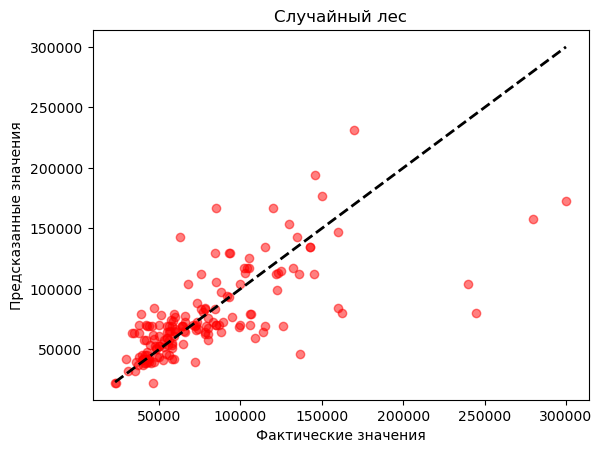

In [34]:
plt.subplot(1, 1, 1)
plt.scatter(y_test, y_pred_rf, color='red', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.title('Случайный лес')

### Сравнение моделей по MSE

In [35]:
mse_lr = mean_squared_error(y_test, y_pred_lr)
mse_dt = mean_squared_error(y_test, y_pred_dt)
mse_rf = mean_squared_error(y_test, y_pred_rf)

print(f'MSE Линейной регрессии: {mse_lr:.2f}')
print(f'MSE Дерева решений: {mse_dt:.2f}')
print(f'MSE Случайного леса: {mse_rf:.2f}')

MSE Линейной регрессии: 1130299609.13
MSE Дерева решений: 1148862712.64
MSE Случайного леса: 1016289649.21


### Проверка значений

In [36]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Базовые предсказания (среднее значение)
y_pred_baseline_mean = np.full_like(y_test, y_train.mean())
mse_baseline_mean = mean_squared_error(y_test, y_pred_baseline_mean)

# Базовые предсказания (медиана)
y_pred_baseline_median = np.full_like(y_test, y_train.median())
mse_baseline_median = mean_squared_error(y_test, y_pred_baseline_median)

print(f'MSE (среднее значение): {mse_baseline_mean:.2f}')
print(f'MSE (медиана): {mse_baseline_median:.2f}')

MSE (среднее значение): 414166563.82
MSE (медиана): 311659733.16


### Вывод: значени MSE каждой модели примерно в три раза превышает значения MSE среднего значения и медианы

### Так как выше на графиках отчетливо видно, что имеется очень много выбросов, их следует удалить, для лучшей работы моделей

In [37]:
# Вычисление IQR для целевой переменной (Price)
Q1 = data_encoded['Price'].quantile(0.25)
Q3 = data_encoded['Price'].quantile(0.75)
IQR = Q3 - Q1

# Определение границ для выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Удаление выбросов
data_cleaned = data_encoded[(data_encoded['Price'] >= lower_bound) & (data_encoded['Price'] <= upper_bound)]
print(f'Размер данных до удаления выбросов: {len(data_encoded)}')
print(f'Размер данных после удаления выбросов: {len(data_cleaned)}')

Размер данных до удаления выбросов: 823
Размер данных после удаления выбросов: 773


### В итоге из 823 данных удалено 50 выбросов

In [39]:
# Подготовка данных
X = data_cleaned.drop('Price', axis=1)  # Признаки
y = data_cleaned['Price']  # Целевая переменная

In [40]:
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
# 1. Линейная регрессия
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)


Text(0.5, 1.0, 'Линейная регрессия')

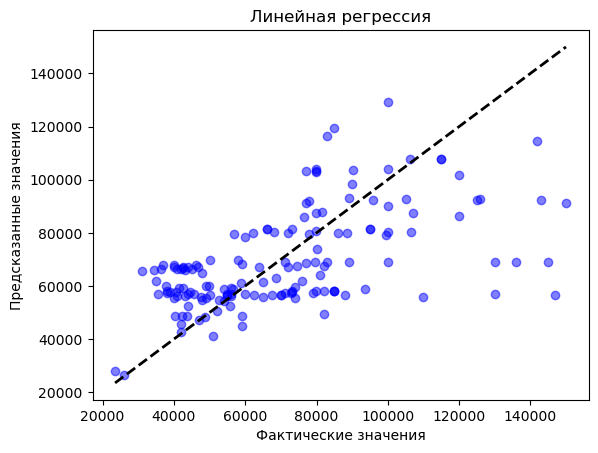

In [42]:
# График для линейной регрессии
plt.subplot(1, 1, 1)
plt.scatter(y_test, y_pred_lr, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.title('Линейная регрессия')

In [43]:
# 2. Регрессия на основе дерева решений
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

Text(0.5, 1.0, 'Дерево решений')

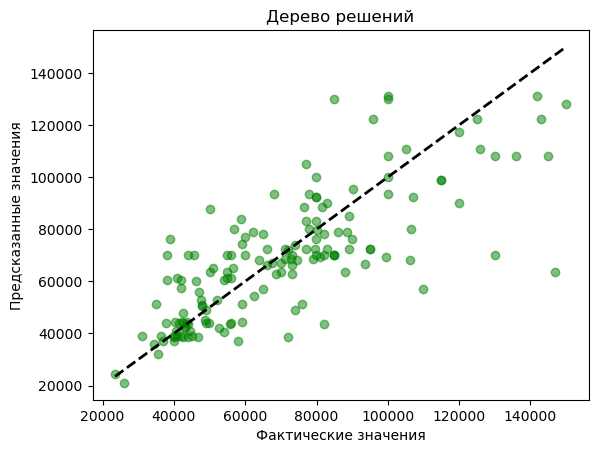

In [45]:
# График для дерева решений
plt.subplot(1, 1, 1)
plt.scatter(y_test, y_pred_dt, color='green', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.title('Дерево решений')

In [46]:
# 3. Случайный лес
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

Text(0.5, 1.0, 'Случайный лес')

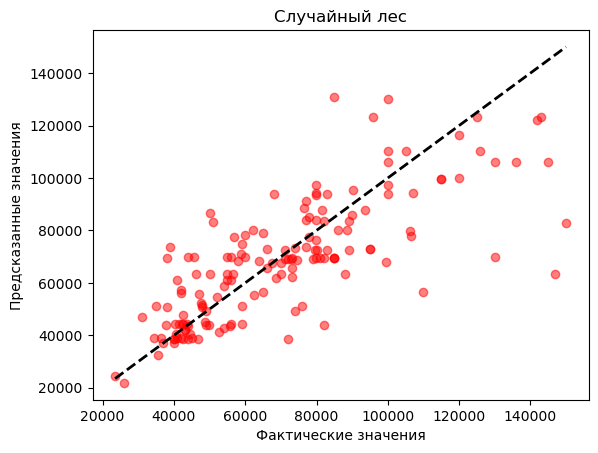

In [48]:
# График для случайного леса
plt.subplot(1, 1, 1)
plt.scatter(y_test, y_pred_rf, color='red', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.title('Случайный лес')

In [50]:
# Сравнение моделей по MSE
mse_lr = mean_squared_error(y_test, y_pred_lr)
mse_dt = mean_squared_error(y_test, y_pred_dt)
mse_rf = mean_squared_error(y_test, y_pred_rf)

print(f'MSE Линейной регрессии: {mse_lr:.2f}')
print(f'MSE Дерева решений: {mse_dt:.2f}')
print(f'MSE Случайного леса: {mse_rf:.2f}')

MSE Линейной регрессии: 520179813.60
MSE Дерева решений: 324643144.17
MSE Случайного леса: 328976853.08


### В итоге видно, что после удаления выбросов MSE стола в 3 раза меньше и самая лучшая модель из проверенных это Дерево решений